<a href="https://colab.research.google.com/github/abiyasa05/Machine_Learning_Ganjil_2023/blob/main/Kuis_1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KUIS 1**

In [1]:
# Melakukan instalasi library python
%pip install torch torchvision numpy matplotlib pandas

In [2]:
# Import library python
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Unduh kumpulan data MNIST menggunakan torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

In [5]:
# Ekstrak data dan label
data = mnist_dataset.data
labels = mnist_dataset.targets

**Detail Kuis**

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset
MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

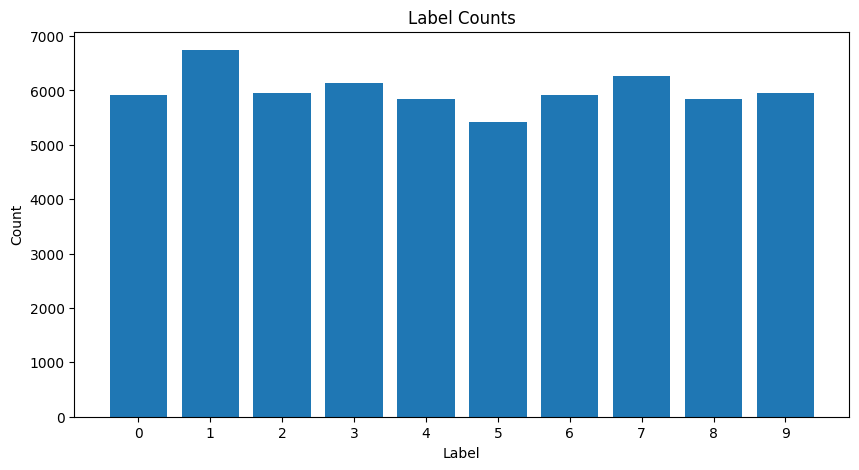

In [6]:
# Menghitung jumlah masing-masing label
label_counts = np.bincount(labels)

# Buat diagram batang untuk memvisualisasikan jumlah label
plt.figure(figsize=(10, 5))
plt.bar(range(len(label_counts)), label_counts)
plt.xticks(range(len(label_counts)), [str(i) for i in range(len(label_counts))])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')
plt.show()

Penjelasan:

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat
menggunakan referensi dari Job Sheet 03.


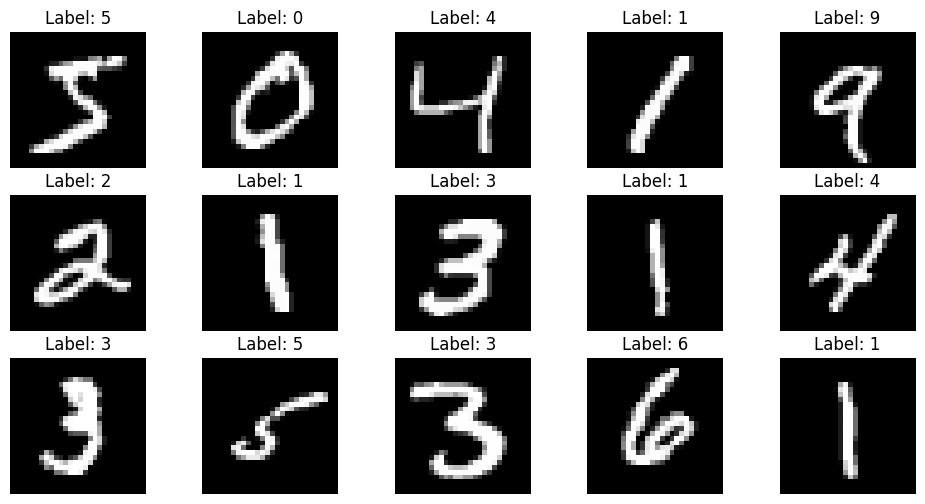

In [7]:
# Buat subplot
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.show()

3.  Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai
fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.

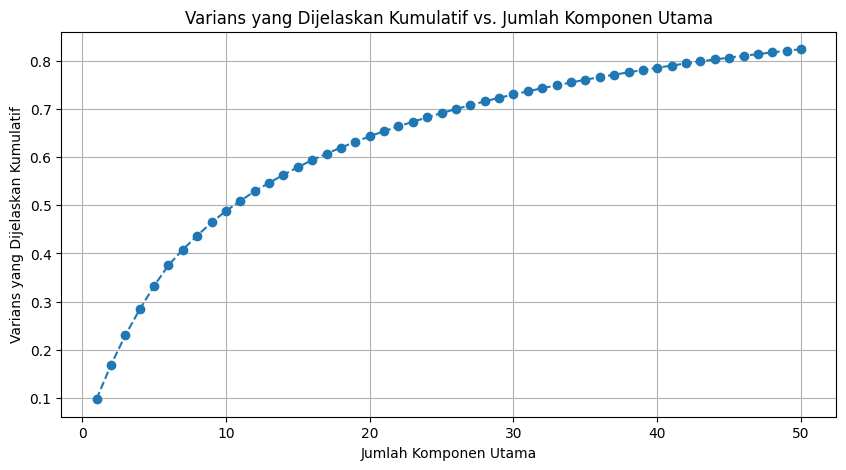

In [8]:
# 3. PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Reshape the data to 1D arrays (flatten)
data = data.reshape(data.shape[0], -1)

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Lakukan PCA dengan jumlah komponen yang diinginkan (misalnya 50)
n_components = 50
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data)

# Plot rasio varians yang dijelaskan
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1),
         cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Varians yang Dijelaskan Kumulatif')
plt.title('Varians yang Dijelaskan Kumulatif vs. Jumlah Komponen Utama')
plt.grid()
plt.show()

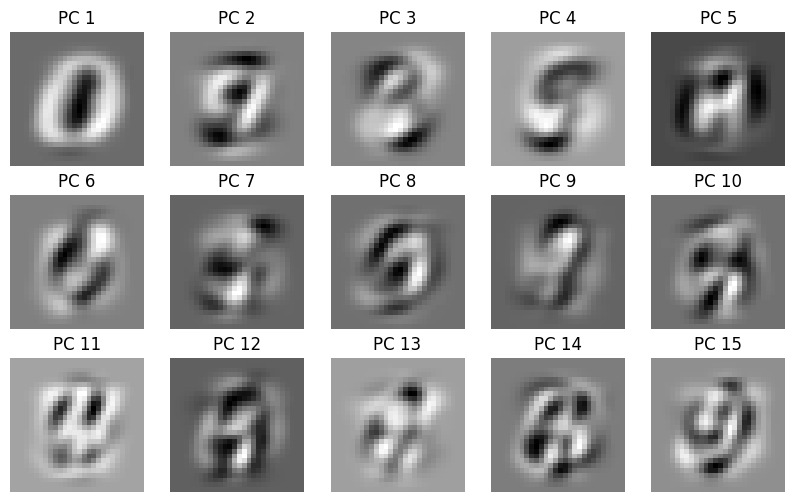

In [9]:
# Visualisasikan 15 komponen utama pertama (eigendigits)
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for i in range(15):
    axi = ax[i // 5, i % 5]
    eigendigit = pca.components_[i].reshape(28, 28)
    axi.imshow(eigendigit, cmap='gray')
    axi.set_title(f'PC {i + 1}')
    axi.axis('off')

plt.show()

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [10]:
# 4. Pisahkan data untuk pengujian dan pelatihan

from sklearn.model_selection import train_test_split

# Bagi data menjadi tiga set pelatihan dan pengujian yang berbeda
X_train, X_test, y_train, y_test = train_test_split(
    data_pca, labels, test_size=0.3)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    data_pca, labels, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    data_pca, labels, test_size=0.1)

# Verifikasi bentuk set pelatihan dan pengujian
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (42000, 50)
y_train shape: torch.Size([42000])
X_test shape: (18000, 50)
y_test shape: torch.Size([18000])


5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
- Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet
03 sebagai acuan.

In [11]:
# 5, 6, 7 sesuai dengan data Anda (menggunakan kernel linier)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

linear_model = SVC(kernel='linear')

In [ ]:
# Sesuaikan model SVM dengan data pelatihan
linear_model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = linear_model.predict(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model SVM dengan kernel linier
linear_model = SVC(kernel='linear')

# Sesuaikan model SVM dengan data pelatihan pertama
linear_model.fit(X_train, y_train)

# Memprediksi label pada data pengujian pertama
y_pred = linear_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
 [[5 0]
 [0 5]]


In [ ]:
# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Contoh data hasil prediksi
y_test = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]

# Menghitung akurasi, laporan klasifikasi, dan matriks kebingungan
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mtx)

Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
 [[5 0]
 [0 5]]


**Klasifikasi dengan SVM**

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_accuracy = svm_classifier.score(X_test, y_test)
print(f'Akurasi: {svm_accuracy * 100:.2f}%')

Akurasi: 97.64%


**Detail Kuis**

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset
MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

# Konversi data menjadi dataframe
df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)

# Tambahkan kolom target
df['target'] = mnist.target

# Hitung jumlah sampel untuk setiap label
label_counts = df['target'].value_counts().sort_index()

print(label_counts)

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: target, dtype: int64


2.  Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat
menggunakan referensi dari Job Sheet 03.

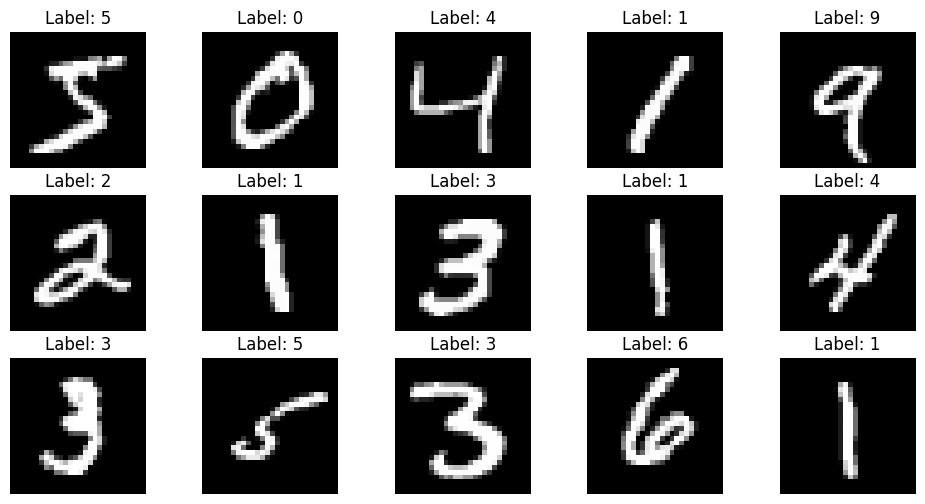

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Ambil 15 citra pertama
num_images_to_show = 15
images_to_show = mnist.data[:num_images_to_show].values.reshape(-1, 28, 28)
labels_to_show = mnist.target[:num_images_to_show]

# Tampilkan citra dan labelnya
plt.figure(figsize=(12, 6))
for i in range(num_images_to_show):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_to_show[i], cmap='gray')
    plt.title(f"Label: {labels_to_show[i]}")
    plt.axis('off')

plt.show()

3.  Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai
fitur
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.

**Nilai Asli Pixel**

In [ ]:
# Fitur ekstraksi: Gunakan nilai asli pixel sebagai fitur
X_train_pixel_values = X_train
X_test_pixel_values = X_test

**Histogram**

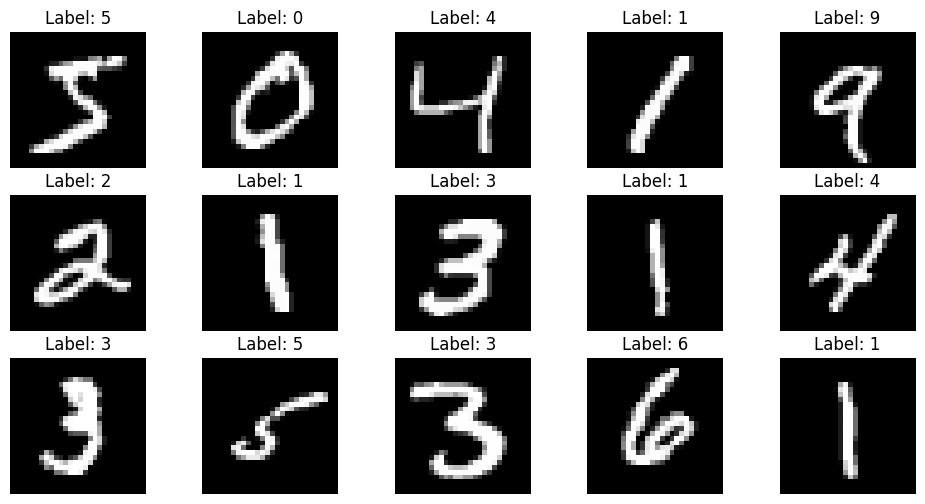

ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from skimage import color, exposure
import matplotlib.pyplot as plt

# Konversi data menjadi dataframe
df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)

# Ambil 15 citra pertama
num_images_to_show = 15
images_to_show = mnist.data[:num_images_to_show].values.reshape(-1, 28, 28).astype(np.uint8)
labels_to_show = mnist.target[:num_images_to_show]

# Tampilkan citra dan labelnya
plt.figure(figsize=(12, 6))
for i in range(num_images_to_show):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_to_show[i], cmap='gray')
    plt.title(f"Label: {labels_to_show[i]}")
    plt.axis('off')

plt.show()

# Ekstraksi fitur dengan histogram
def extract_histogram_features(images):
    features = []
    for img in images:
        # Ubah citra ke skala abu-abu
        img_gray = color.rgb2gray(img)

        # Hitung histogramnya
        hist, _ = exposure.histogram(img_gray)
        features.append(hist)
    return np.array(features)

X_train_histogram_features = extract_histogram_features(images_to_show)

# Cetak fitur ekstraksi histogram
print(X_train_histogram_features)

**PCA**

In [ ]:
from sklearn.decomposition import PCA

# Ekstraksi fitur dengan PCA
n_components = 50  # Jumlah komponen utama yang diinginkan
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan label (y)
X = mnist.data
y = mnist.target

# Rasio 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Rasio 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Rasio 90:10
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

5.  Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM

**Klasifikasi dengan Naive Bayes:**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisialisasi model Naive Bayes
nb_classifier = MultinomialNB()

# Latih model pada data training
nb_classifier.fit(X_train_70, y_train_70)

# Prediksi label pada data testing
y_pred_nb = nb_classifier.predict(X_test_70)

# Evaluasi akurasi
accuracy_nb = accuracy_score(y_test_70, y_pred_nb)
print(f"Akurasi Naive Bayes: {accuracy_nb * 100:.2f}%")

Akurasi Naive Bayes: 82.57%


**Klasifikasi dengan SVM:**

**SVM dengan Klasifikasi Linear**

In [ ]:
from sklearn.svm import SVC

# Inisialisasi model SVM dengan kernel linear
svm_linear_classifier = SVC(kernel='linear')

# Latih model pada data training
svm_linear_classifier.fit(X_train_70, y_train_70)

# Prediksi label pada data testing
y_pred_svm_linear = svm_linear_classifier.predict(X_test_70)

# Evaluasi akurasi
accuracy_svm_linear = accuracy_score(y_test_70, y_pred_svm_linear)
print(f"Akurasi SVM dengan Kernel Linear: {accuracy_svm_linear * 100:.2f}%")

**SVM dengan Kernel RBF (Radial Basis Function)**